In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
df = pd.read_csv("monthly-milk-production-pounds-p.csv")

In [26]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [27]:
df.columns = ['Month', 'Milk in pounds per cow']

In [28]:
df.drop(168, axis=0, inplace = True)

In [29]:
df.tail()

,Month,Milk in pounds per cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [30]:
df['Month'] = pd.to_datetime(df['Month'])

In [31]:
df['Month'] 

0     1962-01-01
1     1962-02-01
2     1962-03-01
3     1962-04-01
4     1962-05-01
         ...    
163   1975-08-01
164   1975-09-01
165   1975-10-01
166   1975-11-01
167   1975-12-01
Name: Month, Length: 168, dtype: datetime64[ns]

In [32]:
df.set_index('Month',inplace=True)

In [33]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [34]:
df.describe()

,Milk in pounds per cow
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


<AxesSubplot:xlabel='Month'>

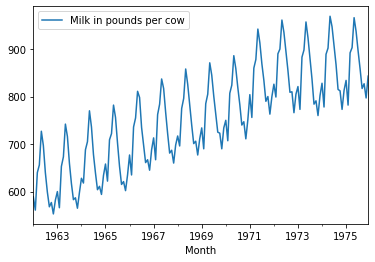

In [35]:
df.plot()

In [36]:
df.columns = ['Month', 'Milk in pounds per cow']

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [37]:
timeseries = df['Milk in pounds per cow']

In [38]:
timeseries

Month
1962-01-01    589.0
1962-02-01    561.0
1962-03-01    640.0
1962-04-01    656.0
1962-05-01    727.0
              ...  
1975-08-01    858.0
1975-09-01    817.0
1975-10-01    827.0
1975-11-01    797.0
1975-12-01    843.0
Name: Milk in pounds per cow, Length: 168, dtype: float64

In [39]:
type(timeseries)

pandas.core.series.Series

<AxesSubplot:xlabel='Month'>

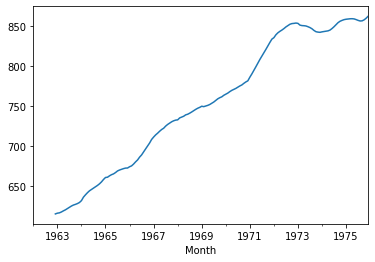

In [41]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')

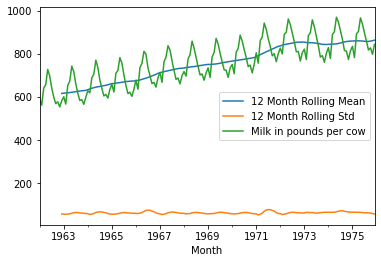

In [52]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend(loc = "best")

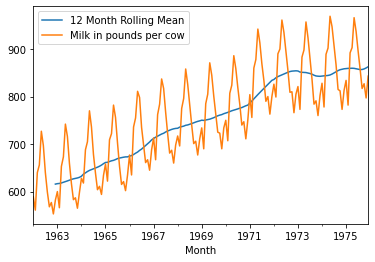

In [55]:
timeseries.rolling(12).mean().plot(label = '12 Month Rolling Mean')
timeseries.plot(label = 'Milk in pounds per cow')
plt.legend(loc = "best")

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Milk in pounds per cow'], period=12)
decomposition

<Figure size 432x288 with 0 Axes>

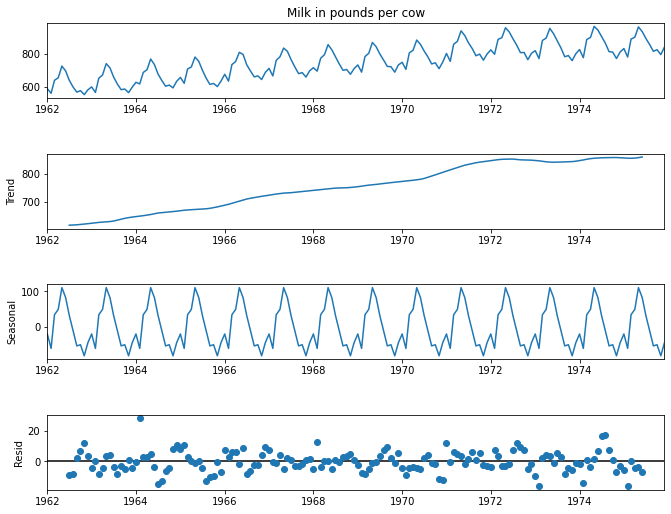

In [60]:
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(10, 8)

In [61]:
from statsmodels.tsa.stattools import adfuller

In [62]:
result = adfuller(df['Milk in pounds per cow'])
result

(-1.3038115874221345,
 0.6274267086030293,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [63]:
labels = ['ADF Test Statistic',
          'p-value',
          '#Lags Used',
          'Number of Observations Used']

In [69]:
for value,label in zip(result,labels):
    print(label+' : '+str(value) )

ADF Test Statistic : -1.3038115874221345
p-value : 0.6274267086030293
#Lags Used : 13
Number of Observations Used : 154


In [ ]:
result[1]

In [75]:
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [83]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic',
              'p-value',
              '#Lags Used',
              'Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("\nstrong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("\nweak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [84]:
df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(1)

Month
1962-01-01     NaN
1962-02-01   -28.0
1962-03-01    79.0
1962-04-01    16.0
1962-05-01    71.0
              ... 
1975-08-01   -38.0
1975-09-01   -41.0
1975-10-01    10.0
1975-11-01   -30.0
1975-12-01    46.0
Name: Milk in pounds per cow, Length: 168, dtype: float64

In [85]:
df['Milk First Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(1)

In [86]:
df['Milk First Difference'] 

Month
1962-01-01     NaN
1962-02-01   -28.0
1962-03-01    79.0
1962-04-01    16.0
1962-05-01    71.0
              ... 
1975-08-01   -38.0
1975-09-01   -41.0
1975-10-01    10.0
1975-11-01   -30.0
1975-12-01    46.0
Name: Milk First Difference, Length: 168, dtype: float64

In [87]:
adf_check(df['Milk First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.0549955586530833
p-value : 0.030068004001784585
#Lags Used : 14
Number of Observations Used : 152

strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


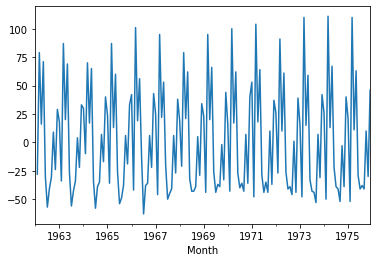

In [92]:
fig = df['Milk First Difference'].plot()

In [93]:
df['Seasonal Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(12)

In [94]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.3354193143594
p-value : 0.16079880527711288
#Lags Used : 12
Number of Observations Used : 143

weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:xlabel='Month'>

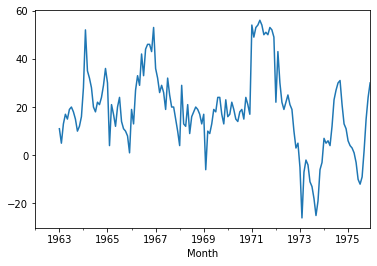

In [95]:
df['Seasonal Difference'].plot()

In [96]:
df['Seasonal First Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(12)

In [99]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.03800227492198
p-value : 1.865423431878859e-05
#Lags Used : 11
Number of Observations Used : 143

strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

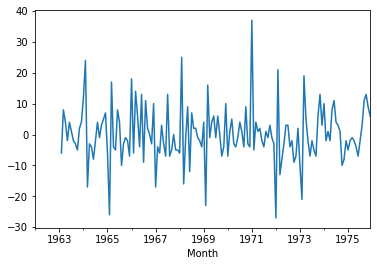

In [100]:
df['Seasonal First Difference'].plot()

In [111]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<AxesSubplot:xlabel='Month'>

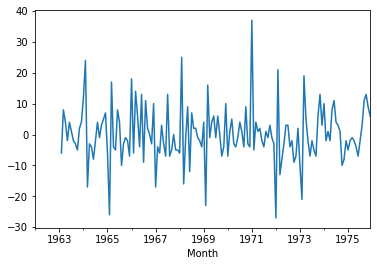

In [112]:
df['Seasonal First Difference'].plot()

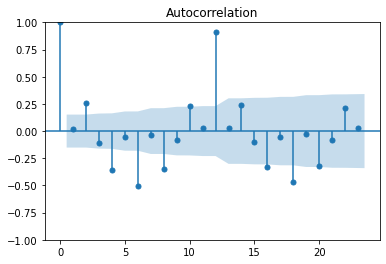

In [113]:
fig_first = plot_acf(df["Milk First Difference"].dropna())

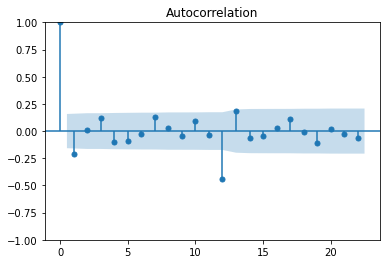

In [116]:
fig_seasonal_first = plot_acf(df["Seasonal First Difference"].dropna())

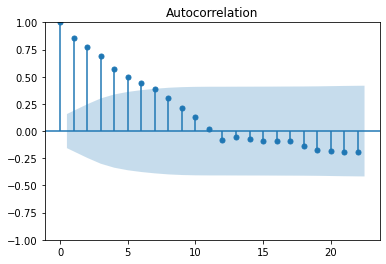

In [117]:
fig_seasonal = plot_acf(df["Seasonal Difference"].dropna())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

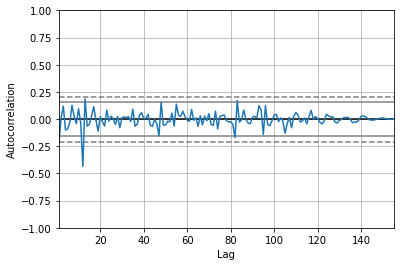

In [119]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Seasonal First Difference'].dropna())

C:\Users\Radhika\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


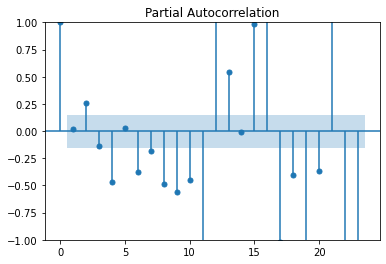

In [128]:
pfig_first = plot_pacf(df["Milk First Difference"].dropna())

C:\Users\Radhika\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


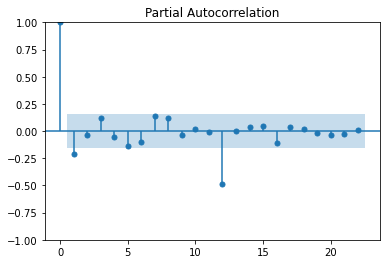

In [129]:
pfig_seasonal_first = plot_pacf(df["Seasonal First Difference"].dropna())

C:\Users\Radhika\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


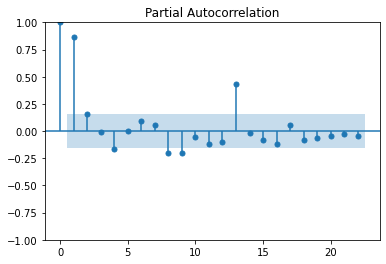

In [130]:
pfig_seasonal = plot_pacf(df["Seasonal Difference"].dropna())

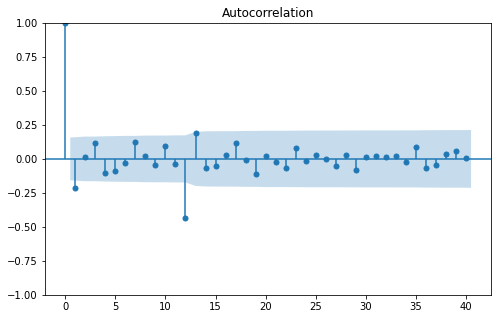

In [141]:
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot()
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags = 40,ax = ax1)

C:\Users\Radhika\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


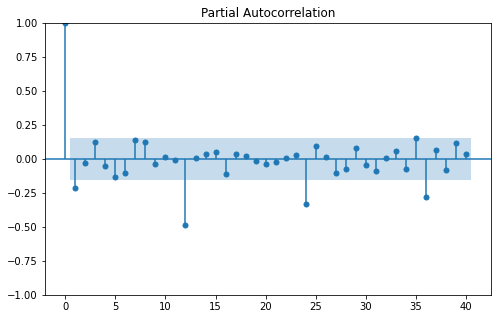

In [142]:
fig = plt.figure(figsize = (8,5))
ax2 = fig.add_subplot()
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags = 40, ax = ax2)

In [144]:
from statsmodels.tsa.arima_model import ARIMA

In [151]:
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds per cow'], order=(0, 1, 0), seasonal_order=(1, 1, 1, 12))

C:\Users\Radhika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Radhika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [154]:
result = model.fit()
result

In [155]:
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:               Milk in pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Wed, 13 Dec 2023   AIC                           1074.131
Time:                                      18:29:45   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

<AxesSubplot:xlabel='Month'>

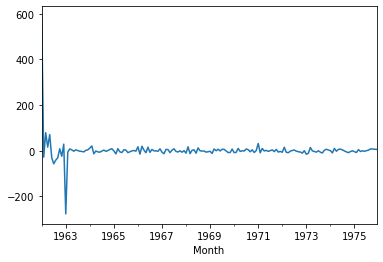

In [157]:
result.resid.plot()

<AxesSubplot:xlabel='Month'>

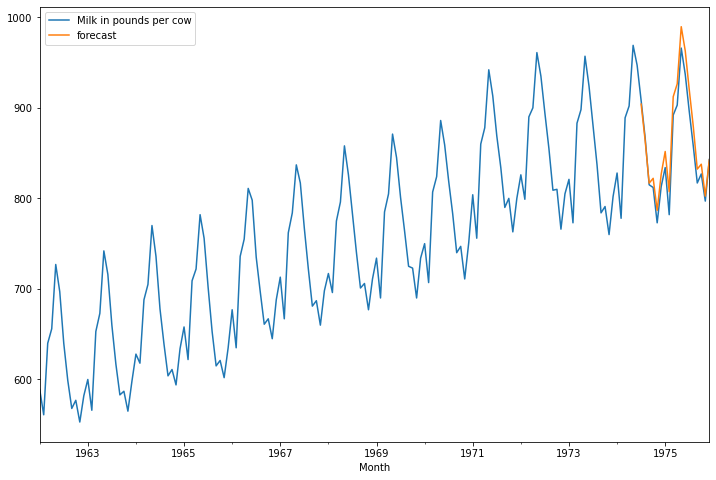

In [164]:
df['forecast'] = result.predict(start = 150,end = 168,dynamic = True)  
df[['Milk in pounds per cow','forecast']].plot(figsize = (12, 8))

In [169]:
df.head()

,Milk in pounds per cow,Milk First Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,
1962-01-01,589.0,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN
1962-03-01,640.0,79.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,NaN,NaN,NaN


In [176]:
df.index[-1] + DateOffset(months = 1)

Timestamp('1976-01-01 00:00:00')

In [171]:
from pandas.tseries.offsets import DateOffset

future_dates = [df.index[-1] + DateOffset(months = x) for x in range(0,24) ]

future_dates_df = pd.DataFrame(index = future_dates[1:],columns = df.columns)

future_df = pd.concat([df,future_dates_df])

In [173]:
future_dates

[Timestamp('1975-12-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [172]:
future_df.head()

,Milk in pounds per cow,Milk First Difference,Seasonal Difference,Seasonal First Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN
1962-03-01,640.0,79.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,NaN,NaN,NaN


<AxesSubplot:>

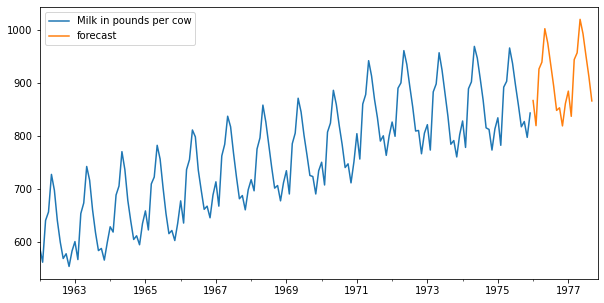

In [181]:
future_df['forecast'] = result.predict(start = 168, end = 188, dynamic = True)
future_df[['Milk in pounds per cow','forecast']].plot(figsize=(10,5))